In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#arboles = pd.read_csv("https://cdn.buenosaires.gob.ar/datosabiertos/datasets/arbolado-publico-lineal/arbolado-publico-lineal-2017-2018.csv")
arboles = pd.read_csv("arbolado.csv")

arboles.head()

C:\Users\Ionatan\AppData\Local\Temp\ipykernel_12328\3586648081.py:6: DtypeWarning: Columns (2,7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  arboles = pd.read_csv("arbolado.csv")


,long,lat,nro_registro,tipo_activ,comuna,manzana,calle_nombre,calle_altura,calle_chapa,direccion_normalizada,ubicacion,nombre_cientifico,ancho_acera,estado_plantera,ubicacion_plantera,nivel_plantera,diametro_altura_pecho,altura_arbol
0,-58.378563,-34.594902,26779,Lineal,1,NaN,Esmeralda,1000.0,1120.0,ESMERALDA 1120,NaN,Tipuana tipu,5.5,Ocupada,Regular,A nivel,88.0,34.0
1,-58.381532,-34.592319,30887,Lineal,1,NaN,Pellegrini Carlos,1300.0,1345.0,"PELLEGRINI, CARLOS 1345",Exacta,Peltophorum dubium,4.5,Ocupada,Regular,Elevada,6.0,5.0
2,-58.379103,-34.591939,30904,Lineal,1,NaN,Arroyo,800.0,848.0,ARROYO 848,Exacta,Fraxinus pennsylvanica,4,Ocupada,Regular,A nivel,7.0,6.0
3,-58.380710,-34.591548,31336,Lineal,1,NaN,Arroyo,900.0,932.0,ARROYO 932,LD,Fraxinus pennsylvanica,NaN,Ocupada,Regular,A nivel,9.0,29.0
4,-58.380710,-34.591548,31337,Lineal,1,NaN,Arroyo,900.0,932.0,ARROYO 932,LA,Jacaranda mimosifolia,NaN,Ocupada,Regular,A nivel,13.0,8.0


In [36]:
arboles['nombre_cientifico'].value_counts().index[:10]

Index(['Fraxinus pennsylvanica', 'Platanus x acerifolia', 'Ficus benjamina',
       'Tilia x moltkei', 'Melia azedarach', 'Jacaranda mimosifolia',
       'Lagerstroemia indica', 'Fraxinus americana', 'No identificado',
       'Tipuana tipu'],
      dtype='object')

<AxesSubplot:xlabel='diametro_altura_pecho', ylabel='altura_arbol'>

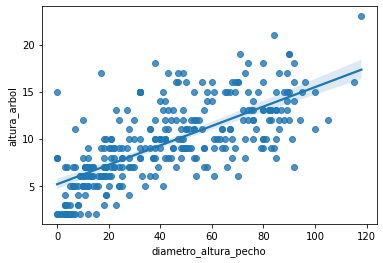

In [37]:
arbolado = arboles[arboles['nombre_cientifico'] == arboles['nombre_cientifico'].value_counts().index[60]]
sns.regplot(data=arbolado, x='diametro_altura_pecho', y='altura_arbol')


In [38]:
arbolado = arbolado[['diametro_altura_pecho','altura_arbol','long','lat','comuna']].dropna()
arbolado.head()



In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV

X = arbolado[['diametro_altura_pecho','long','lat','comuna']]
y = arbolado['altura_arbol']



In [40]:
X = arbolado[['diametro_altura_pecho','long','lat','comuna']]
y = arbolado['altura_arbol']


X_train, X_test, y_train, y_test = train_test_split(X, y, tr)

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)


In [41]:
model_OLS = LinearRegression(fit_intercept=True)

model_OLS.fit(X_train_std, y_train)

print(model_OLS.coef_)

print(model_OLS.intercept_)

[ 3.01190437  0.22974917  0.6591628  -0.36923598]
8.879999999999914


In [42]:
model_ridge_cv = RidgeCV(alphas= [0.3, 0.5, 1.0, 1.1, 1.15, 1.17, 1.18, 1.19, 1.2, 1.21, 1.22, 1.3, 1.4, 1.5, 10.0], 
                                   fit_intercept=True, cv=10)
model_ridge_cv.fit(X_train_std, y_train)

print(model_ridge_cv.alpha_)

print(model_ridge_cv.coef_)

print(model_ridge_cv.intercept_)

10.0
[ 2.44833026  0.07247056  0.7472345  -0.3751418 ]
8.87999999999992


In [43]:
model_lasso_cv = LassoCV(alphas= [0.3, 0.5, 1.0, 1.1, 1.15, 1.17, 1.18, 1.19, 1.2, 1.21, 1.22, 1.3, 1.4, 1.5, 10.0], 
                                   fit_intercept=True, cv=10)
model_lasso_cv.fit(X_train_std, y_train)

print(model_lasso_cv.alpha_)

print(model_lasso_cv.coef_)

print(model_lasso_cv.intercept_)


0.5
[ 2.62732182  0.          0.19409154 -0.        ]
8.879999999999981


In [44]:
# Comparamos metricas en train y en test

print ('Modelo OLS:\n')
print (f'Score (R^2) en train del modelo es {model_OLS.score(X_train_std, y_train)} y en test es {model_OLS.score(X_test_std, y_test)}')
print ('\n')

print ('Modelo Ridge:\n')
print (f'Score (R^2) en train del modelo es {model_ridge_cv.score(X_train_std, y_train)} y en test es {model_ridge_cv.score(X_test_std, y_test)}')
print ('\n')

print ('Modelo Lasso:\n')
print (f'Score (R^2) en train del modelo es {model_lasso_cv.score(X_train_std, y_train)} y en test es {model_lasso_cv.score(X_test_std, y_test)}')
print ('\n')

Modelo OLS:

Score (R^2) en train del modelo es 0.56133051743436 y en test es 0.5404726664378952


Modelo Ridge:

Score (R^2) en train del modelo es 0.5475656634406405 y en test es 0.5382610937876569


Modelo Lasso:

Score (R^2) en train del modelo es 0.52943094466748 y en test es 0.4757985846658862


